In [56]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


Populating the interactive namespace from numpy and matplotlib


In [57]:
# Specific Plotting Params
i_leu = 0
i_delta = 2
i_heu = 4

xlab = "Time (months)"
ylab = "Throughput (kg)"
plot_dir = "/Users/mbmcgarry/git/cyclus_runs/random_sink/png/"

ps = 0

In [58]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  



In [59]:
dir = 'data/random_sink/'
file_HEU003 = dir + 'HEU03p_aq33_s_05_swu180_t100_E5.csv'
file_HEU003_noHEU = dir + 'HEU0p_aq33_s_05_swu180_t100_E5.csv'

raw_data = pd.read_csv(file_HEU003) 
raw_data_noHEU = pd.read_csv(file_HEU003_noHEU) 

In [60]:
LEU = raw_data[raw_data['Prototype'] == "LEU"]
delta_LEU = raw_data[raw_data['Prototype'] == "delta_LEU"]
covert_HEU = raw_data[raw_data['Prototype'] == "covert_HEU"]

LEU_noHEU = raw_data_noHEU[raw_data_noHEU['Prototype'] == "LEU"]
delta_LEU_noHEU = raw_data_noHEU[raw_data_noHEU['Prototype'] == "delta_LEU"]

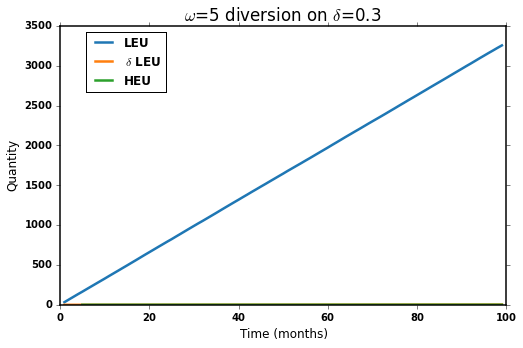

In [61]:
# Limit the range of the plot to only where the data is.  
# Avoid unnecessary whitespace.  
#ylim(ymin, ymax)  
#xlim(1968, 2014)  

p_leu = plt.plot(LEU['Time'],LEU[' Quantity'], label='LEU', color=tableau20[i_leu])
p_delta = plt.plot(delta_LEU['Time'],delta_LEU[' Quantity'], label='$\delta$ LEU', color=tableau20[i_delta])
p_heu = plt.plot(covert_HEU['Time'],covert_HEU[' Quantity'], label='HEU', color=tableau20[i_heu])

plt.legend(bbox_to_anchor=(0.25, 1))
plt.xlabel(xlab)
plt.ylabel('Quantity')
plt.title("$\omega$=5 diversion on $\delta$=0.3")


# Finally, save the figure as a PNG.  
# You can also save it as a PDF, JPEG, etc.  
# Just change the file extension in this call.  
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.  
#savefig("filename.png", bbox_inches="tight"); 

In [62]:
LEU_tp =(LEU[' Quantity']- LEU[' Quantity'].shift(1))
delta_LEU_tp =  delta_LEU[' Quantity']- delta_LEU[' Quantity'].shift(1)
covert_HEU_tp =  covert_HEU[' Quantity']- covert_HEU[' Quantity'].shift(1) 

LEU_noHEU_tp =(LEU_noHEU[' Quantity']- LEU_noHEU[' Quantity'].shift(1))
delta_LEU_noHEU_tp =  delta_LEU_noHEU[' Quantity']- delta_LEU_noHEU[' Quantity'].shift(1)


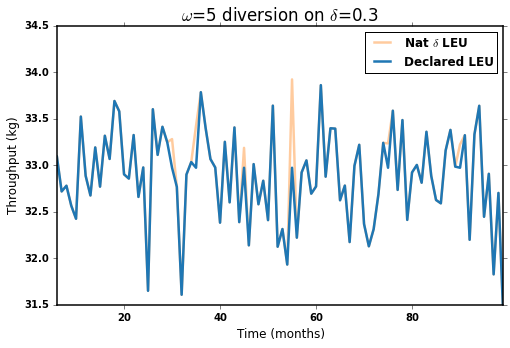

In [63]:
xmin=6
xmax=max(LEU['Time'])
ymin=31.5
ymax=34.5
xlim(xmin, xmax)
ylim(ymin, ymax)
alpha=0.4

plt.plot(LEU_noHEU['Time'],(LEU_noHEU_tp), label='Nat $\delta$ LEU', color=tableau20[i_delta], alpha=alpha)
plt.plot(LEU['Time'],(LEU_tp), label='Declared LEU', color=tableau20[i_leu])
plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'nat_delta_E5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


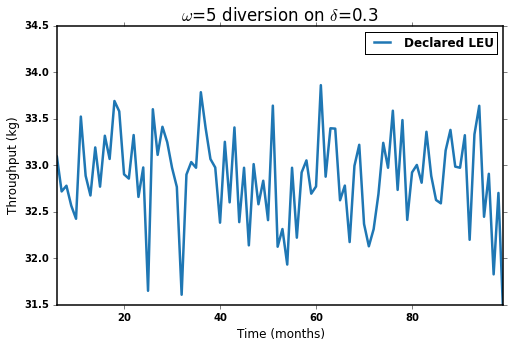

In [64]:
xlim(xmin, xmax)
ylim(ymin, ymax)

plt.plot(LEU['Time'],(LEU_tp), label='Declared LEU', color=tableau20[i_leu])
plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'declared_E5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


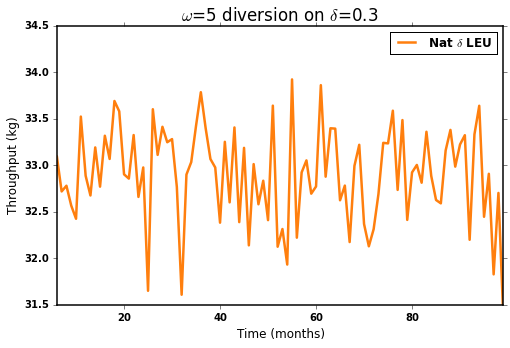

In [65]:
xlim(xmin, xmax)
ylim(ymin, ymax)

plt.plot(LEU_noHEU['Time'],(LEU_noHEU_tp), label='Nat $\delta$ LEU', color=tableau20[i_delta])
plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'nat_E5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


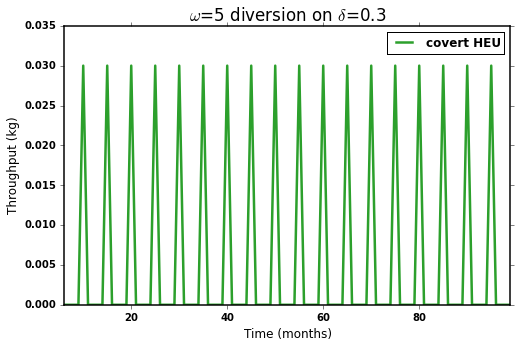

In [66]:
xlim(xmin, xmax)

plt.plot(LEU['Time'][4:],covert_HEU_tp, label='covert HEU', color=tableau20[i_heu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'HEU_E5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")

In [67]:
from manip_data import trunc_flt

(31, 35)

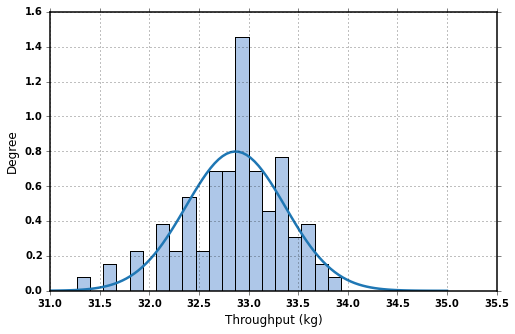

In [68]:
precision=2

bins=30
hist_min=31
hist_max=35
LEU['Time'],(LEU_tp)
m_hist = LEU_tp.plot(kind='hist', bins=bins,color=tableau20[i_leu+1],
              alpha=1.0,range=(hist_min,hist_max),normed=1,label='net LEU')
mean_delta = np.mean(LEU_tp)
variance_delta = np.var(LEU_tp)
sigma_delta = np.sqrt(variance_delta)
x = np.linspace(hist_min,hist_max,100)
    
plt.plot(x,mlab.normpdf(x,mean_delta,sigma_delta),color=tableau20[i_leu], 
         label='net LEU: $\sigma_{\mu}$=' + trunc_flt(sigma_delta, precision))
plt.xlabel(ylab)

if ps == 1:
    savefig(plot_dir + 'netLEU_hist_E5.png')
    
hist_min, hist_max

In [69]:
from manip_data import import_data
from manip_data import calc_fft
from manip_data import fft_heu

This Set of Data was run taken before I fixed the RNG to be reproducible. 
It is all located in non_determ and is used only for the Fourier analysis below. 

In [70]:
dir_nd = 'data/random_sink/fourier_test/non_determ/'

file_no_rand = dir_nd + 'no_random.csv'
file_HEU0 = dir_nd + 'no_heu.csv'
file_HEU003 = dir_nd + 'sum_data.csv'
file_HEU01 = dir_nd + 'HEU0.1.csv'
file_HEU03 = dir_nd + 'HEU0.3.csv'
file_HEU1 = dir_nd + 'clear_E5_sig.csv'
file_HEU_R1 = dir + 'HEU03p_aq33_s_05_swu180_t100_R5.csv'


In [71]:
none_ps, none_freqs, none_idx = calc_fft(file_no_rand)
HEU0_ps, HEU0_freqs, HEU0_idx = calc_fft(file_HEU0)

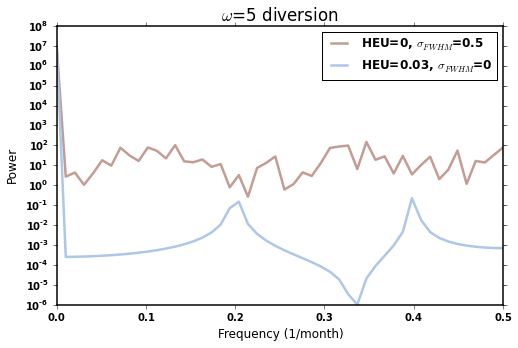

In [72]:
plt.plot(HEU0_freqs[HEU0_idx], HEU0_ps[HEU0_idx], color=tableau20[9], label='HEU=0, $\sigma_{FWHM}$=0.5')
plt.plot(none_freqs[none_idx], none_ps[none_idx], color=tableau20[1], label='HEU=0.03, $\sigma_{FWHM}$=0')

legend()
plt.yscale('log')
plt.xlabel('Frequency (1/month)')
plt.ylabel('Power')
plt.title("$\omega$=5 diversion")



In [73]:
HEU003ps, HEU003freqs, HEU003idx = calc_fft(file_HEU003)
HEU01ps, HEU01freqs, HEU01idx = calc_fft(file_HEU01)
HEU03ps, HEU03freqs, HEU03idx = calc_fft(file_HEU03)
HEU1ps, HEU1freqs, HEU1idx = calc_fft(file_HEU1)
HEU_R1ps, HEU_R1freqs, HEU_R1idx = calc_fft(file_HEU_R1)


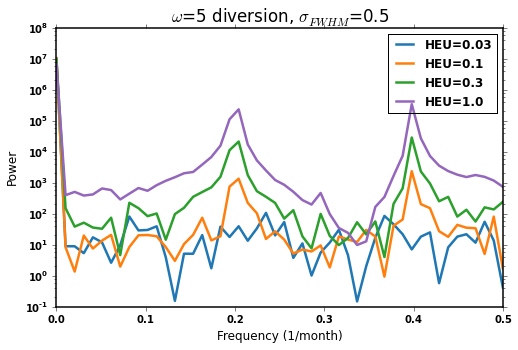

In [74]:
plt.plot(HEU003freqs[HEU003idx], HEU003ps[HEU003idx], color=tableau20[0], label='HEU=0.03')
plt.plot(HEU01freqs[HEU01idx], HEU01ps[HEU01idx], color=tableau20[2], label='HEU=0.1')
plt.plot(HEU03freqs[HEU03idx], HEU03ps[HEU03idx], color=tableau20[4], label='HEU=0.3')
plt.plot(HEU1freqs[HEU1idx], HEU1ps[HEU1idx], color=tableau20[6], label='HEU=1.0')

legend()
plt.yscale('log')
plt.xlabel('Frequency (1/month)')
plt.ylabel('Power')
plt.title("$\omega$=5 diversion, $\sigma_{FWHM}$=0.5")

if ps == 1:
    savefig(plot_dir + 'fourier_analysis.png')

In [75]:
# Plots signal and noise FFTs independently,.
#plt.plot(HEU_R1_t_freqs[HEU_R1_t_idx], HEU_R1_t_ps[HEU_R1_t_idx], color=tableau20[10], label='HEU=1, t*10 (R)')
#plt.plot(HEU1freqs[HEU1idx], HEU1ps[HEU1idx], color=tableau20[6], label='HEU=1 (E)')
#plt.plot(HEU_R1freqs[HEU_R1idx], HEU_R1ps[HEU_R1idx], color=tableau20[8], label='HEU=1 (R)')

#legend()
#plt.yscale('log')
#plt.xlabel('Frequency (1/month)')
#plt.ylabel('Power')
#plt.title("$\omega$=5 diversion, $\sigma_{FWHM}$=0.5")



This Data was all re-calculated on 29-Apr-2015 to include the Cyclist fix for 1st data point, as well as the reproducible RNG.

In [76]:
#file_HEU04_R1_1000 = dir + 'HEU03p_aq33_s_05_swu180_t100_R5.csv'
file_HEU_R1_1000 = dir + 'HEU03p_aq33_s_05_swu180_t1009_R5.csv'
file_noHEU_1000 = dir + 'HEU0p_aq33_s_05_swu180_t1009_R5.csv'

LEU04_1000_tp, delta_LEU04_1000_tp, covert_HEU04_1000_tp, time_1000 = \
    import_data(file_HEU_R1_1000, 'covert_HEU') 
LEU_1000_tp, delta_LEU_1000_tp, covert_HEU_1000_tp, time_1000_delta = \
    import_data(file_HEU_R1_1000, 'LEU') 
LEU_1000_noHEU_tp, delta_LEU_1000_noHEU_tp, covert_HEU_1000_noHEU_tp, time_1000_noHEU = \
    import_data(file_noHEU_1000, 'delta_LEU')
#LEU_1000_noHEU2_tp, delta_LEU_1000_noHEU2_tp, covert_HEU_1000_noHEU2_tp, time_1000_noHEU2 = \
#    import_data(file_noHEU2_1000, 'delta_LEU')


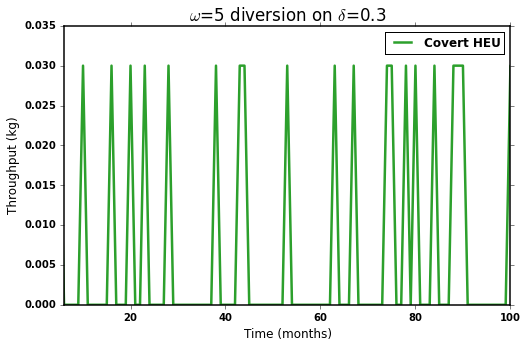

In [77]:
xmin = 6
xmax = 100
xlim(xmin, xmax)
plt.plot(time_1000, covert_HEU04_1000_tp, label='Covert HEU', color=tableau20[i_heu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'HEU_R5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


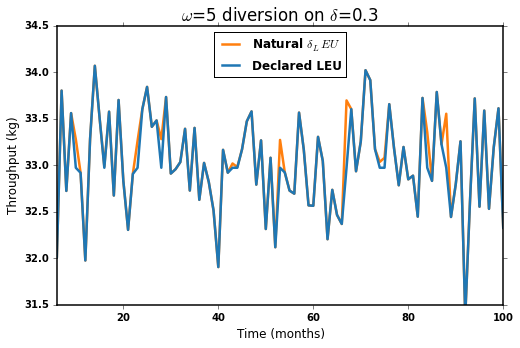

In [78]:
xlim(xmin, xmax)
ylim(ymin, ymax)
plt.plot(time_1000_delta, LEU_1000_noHEU_tp , label='Natural $\delta_LEU$', color=tableau20[i_delta])
plt.plot(time_1000_delta, LEU_1000_tp, label='Declared LEU', color=tableau20[i_leu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'nat_R5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


'/Users/mbmcgarry/cyclist_runs/ef_behavior_201501/random_sink/fourier_test/png/new/'

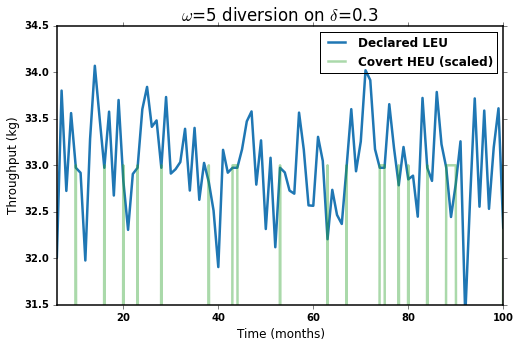

In [79]:
xmin = 6
xmax = 100
xlim(xmin, xmax)
ylim(ymin, ymax)
plt.plot(time_1000_delta, LEU_1000_tp, label='Declared LEU', color=tableau20[i_leu])
plt.plot(time_1000, covert_HEU04_1000_tp*1100, label='Covert HEU (scaled)', color=tableau20[i_heu], alpha=alpha)

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'HEU_LEU_R5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")
plot_dir

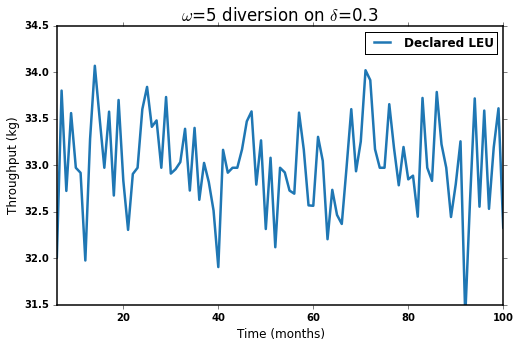

In [80]:
xlim(xmin, xmax)
ylim(ymin, ymax)
plt.plot(time_1000_delta, LEU_1000_tp, label='Declared LEU', color=tableau20[i_leu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'declared_R5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


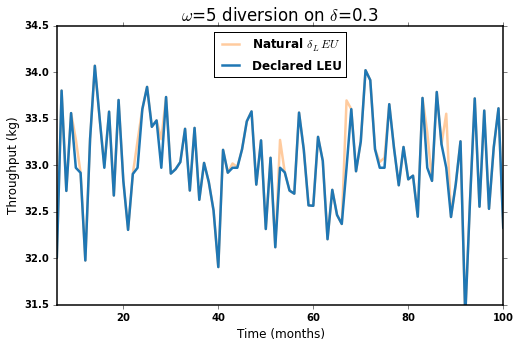

In [81]:
xlim(xmin, xmax)
ylim(ymin, ymax)
plt.plot(time_1000_delta, LEU_1000_noHEU_tp , label='Natural $\delta_LEU$', color=tableau20[i_delta], alpha=alpha)
plt.plot(time_1000_delta, LEU_1000_tp, label='Declared LEU', color=tableau20[i_leu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab)

if ps == 1:
    savefig(plot_dir + 'nat_delta_R5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")

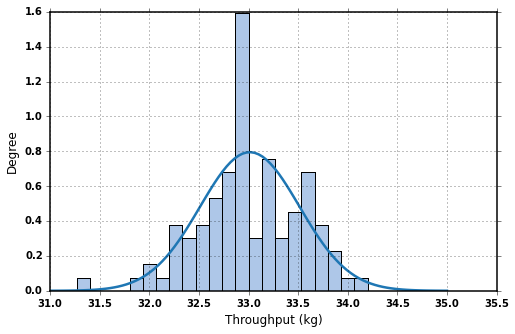

In [85]:
precision=2

bins=30
xmin=31
xmax=35
#xmin=min(LEU_1000[1:])
#xmax=max(LEU_1000[1:])
m_hist = LEU04_1000_tp[:100].plot(kind='hist', bins=bins,color=tableau20[i_leu+1],
              alpha=1.0,range=(xmin,xmax),normed=1,label='net LEU')
mean_delta = np.mean(LEU04_1000_tp[:100])
variance_delta = np.var(LEU04_1000_tp[:100])
sigma_delta = np.sqrt(variance_delta)
x = np.linspace(xmin,xmax,100)
    
plt.plot(x,mlab.normpdf(x,mean_delta,sigma_delta),color=tableau20[i_leu], 
         label='net LEU: $\sigma_{\mu}$=' + trunc_flt(sigma_delta, precision))
plt.xlabel(ylab)

'''
mean_noHEU = np.mean(LEU_1000_noHEU_tp[:100])
variance_noHEU = np.var(LEU_1000_noHEU_tp[:100])
sigma_noHEU = np.sqrt(variance_noHEU)


plt.plot(x,mlab.normpdf(x,mean_noHEU,sigma_noHEU),color=tableau20[i_leu+5],
         label='no HEU: $\sigma_{\mu}$='+trunc_flt(sigma_noHEU, precision))

lines, labels = m_hist.get_legend_handles_labels()
leg = m_hist.legend(lines[:2],labels[:2], handlelength=0)  # legend for first two lines only

def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

color_legend_texts(leg)

'''

if ps == 1:
     savefig(plot_dir + 'netLEU_hist_R5.png')

0.022271852555625003

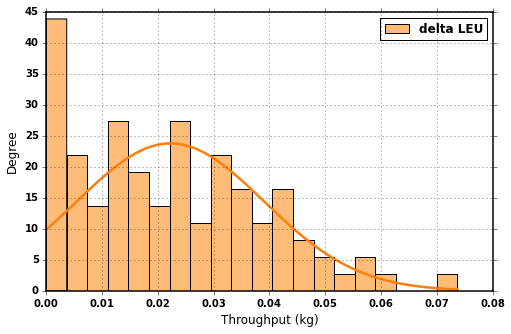

In [83]:
bins=20
xmin=min(delta_LEU04_1000_tp[1:])
xmax=max(delta_LEU04_1000_tp[1:])
delta_LEU04_1000_tp[:100].plot(kind='hist', bins=bins,color=tableau20[i_delta+1],
                    alpha=1.0,range=(xmin,xmax),normed=1,label='delta LEU')
mean_delta = np.mean(delta_LEU04_1000_tp[:100])
variance_delta = np.var(delta_LEU04_1000_tp[:100])
sigma_delta = np.sqrt(variance_delta)
x = np.linspace(xmin,xmax,100)

plt.plot(x,mlab.normpdf(x,mean_delta,sigma_delta),color=tableau20[i_delta])
legend()
plt.xlabel(ylab)
mean_delta